In [24]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

Class distribution: [35 35 35]


Discuss: Why no single classifier is best? Consider dataset size, noise, separability.

No single classifier performs best as the performance relies on the nature of datasets. Simple models such as Logistic Regression or KNN, perform better with small datasets, complex models such as Random Forests or SVM, learn more patterns with large datasets. With noisy data, some models may overfit, but combined methods like ensembles handle noise better. Linear classifiers work well if the data is linearly separable, but for a non-linear boundary, techniques such as kernel SVM or decision trees are a better choice.

In short, dataset size, noise level, and class separability all influence which classifier works best, explaining why practitioners test multiple models instead of relying on just one.

In [26]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)


Iris Perceptron eta0=0.01: Accuracy=0.956


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


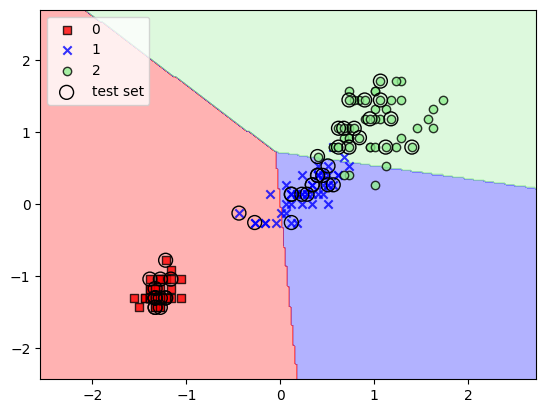

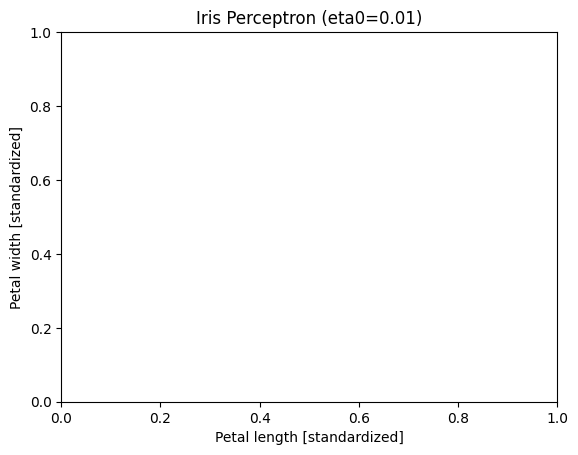

Iris Perceptron eta0=0.1: Accuracy=0.978


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


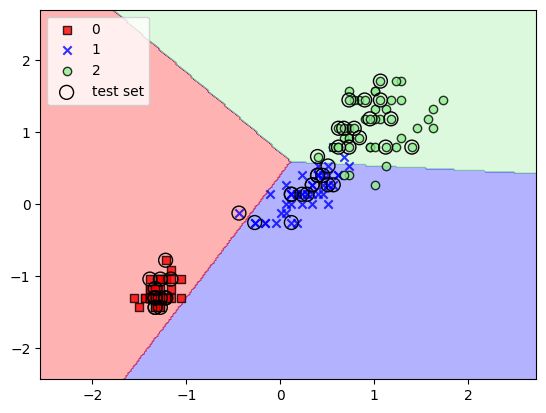

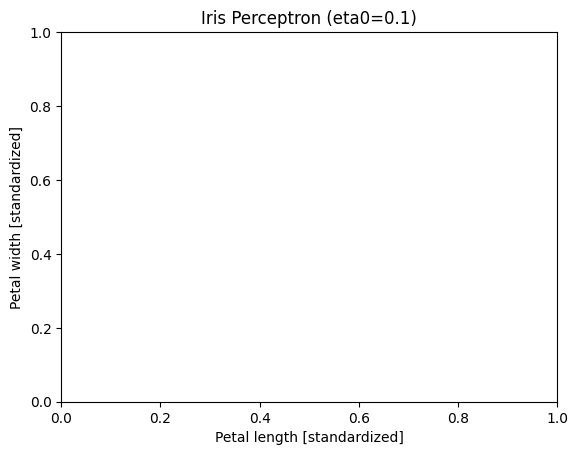

Iris Perceptron eta0=1.0: Accuracy=0.889


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


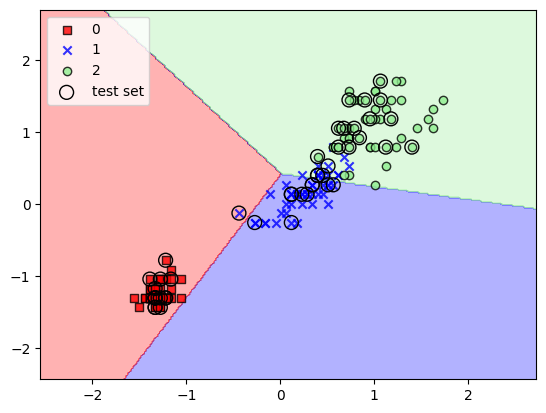

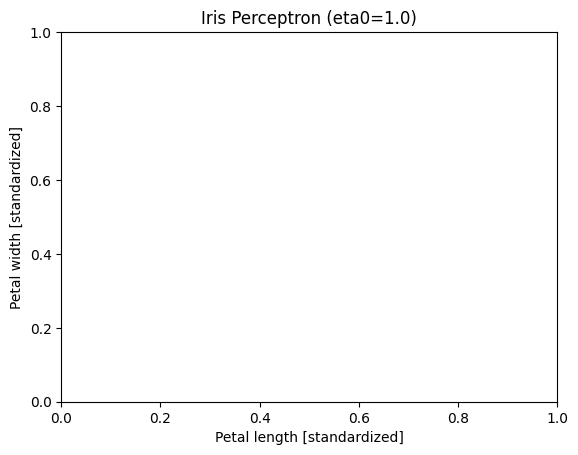

In [27]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


for lr in [0.01, 0.1, 1.0]:
    ppn = Perceptron(max_iter=40, eta0=lr, random_state=1)
    ppn.fit(X_train_std, y_train)

    y_pred = ppn.predict(X_test_std)
    print(f"Iris Perceptron eta0={lr}: Accuracy={accuracy_score(y_test, y_pred):.3f}")

    plot_decision_regions(X_combined_std, y_combined,classifier=ppn,test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Iris Perceptron (eta0={lr})')
    plt.show()



1. Vary eta0 (0.01, 0.1, 1). Observe convergence/misclassifications.

With eta0=0.01, learning is slow and may need more iterations.

With eta0=0.1, convergence is stable and accuracy is high.

With eta0=1.0, the large step size may cause oscillations and slightly more misclassifications.

2. Try on moons dataset. Why does it fail?

On the Moons dataset, the Perceptron fails regardless of eta0 because the data is nonlinearly separable.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Iris Logistic Regression C=0.01: Accuracy=0.689
probabilities: [[0.18415623 0.35370809 0.46213568]
 [0.48146488 0.30637586 0.21215926]
 [0.50097506 0.30080668 0.19821826]]


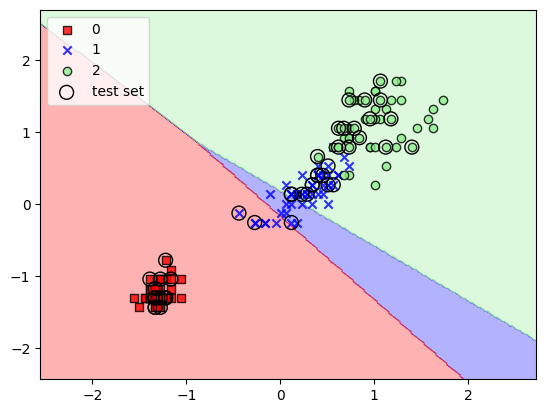

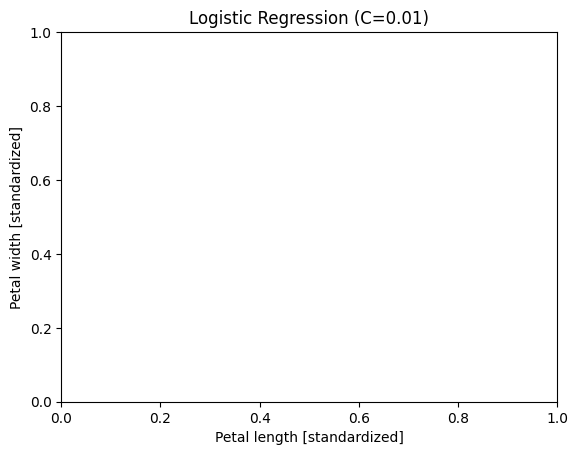

Iris Logistic Regression C=1.0: Accuracy=0.978
probabilities: [[4.35424381e-04 2.40133856e-01 7.59430720e-01]
 [7.98498914e-01 2.01272655e-01 2.28430822e-04]
 [8.15960440e-01 1.83929887e-01 1.09672897e-04]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


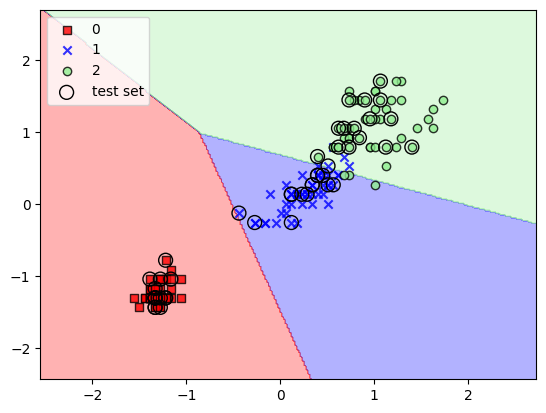

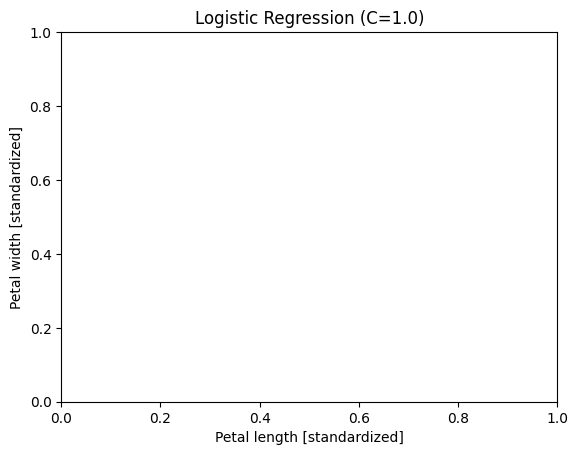

Iris Logistic Regression C=100: Accuracy=0.978
probabilities: [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


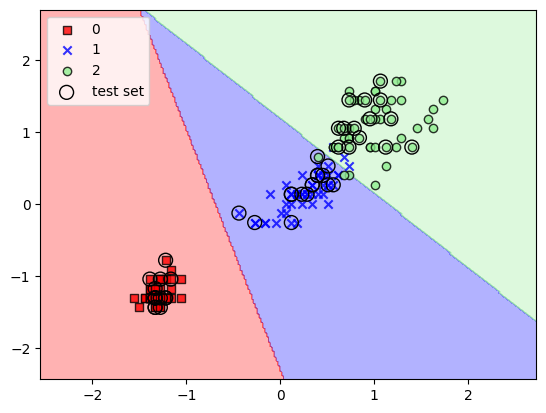

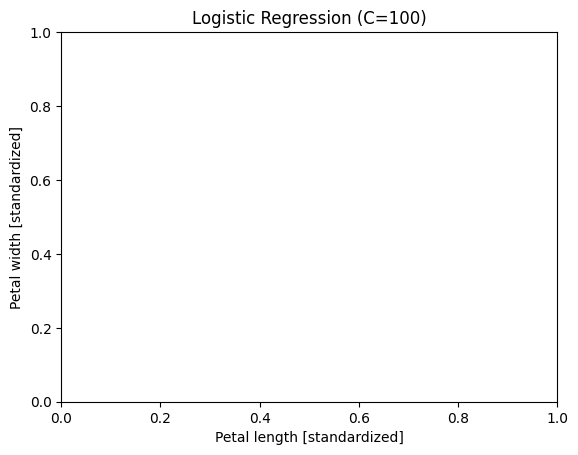

In [28]:
from sklearn.linear_model import LogisticRegression

for c in [0.01, 1.0, 100]:
    lr = LogisticRegression(C=c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)

    y_pred = lr.predict(X_test_std)
    print(f"Iris Logistic Regression C={c}: Accuracy={accuracy_score(y_test, y_pred):.3f}")
    print("probabilities:", lr.predict_proba(X_test_std[:3]))

    plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression (C={c})')
    plt.show()


SVM with C=1.0: Accuracy = 0.978
Number of support vectors (C=1.0): 26
Support vectors:
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.39625036  0.3970548 ]
 [ 0.50779537  0.2659518 ]] ...


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


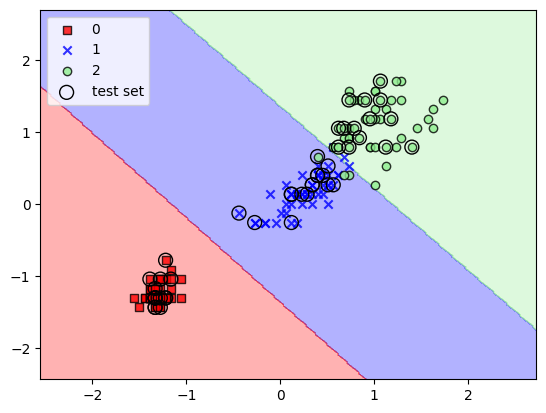

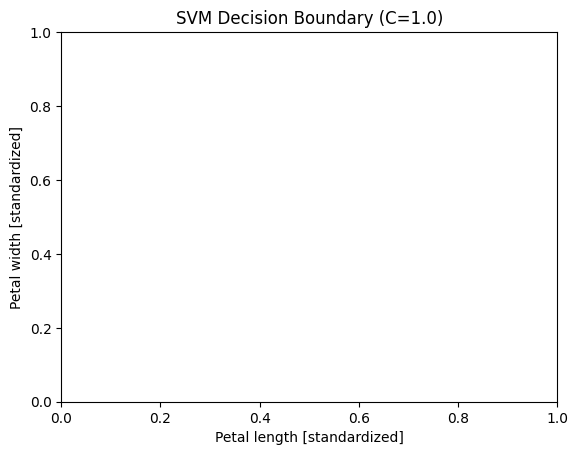

SVM with C=100: Accuracy = 0.978
Number of support vectors (C=100): 14
Support vectors:
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]] ...


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


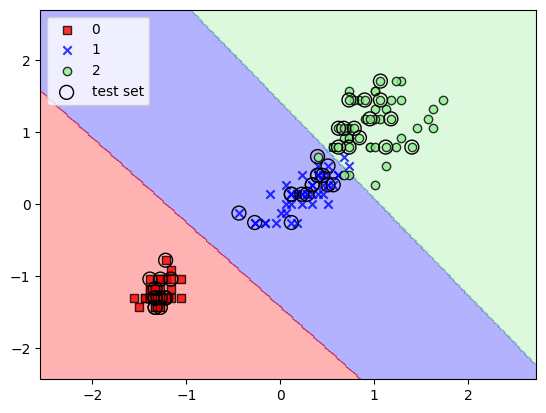

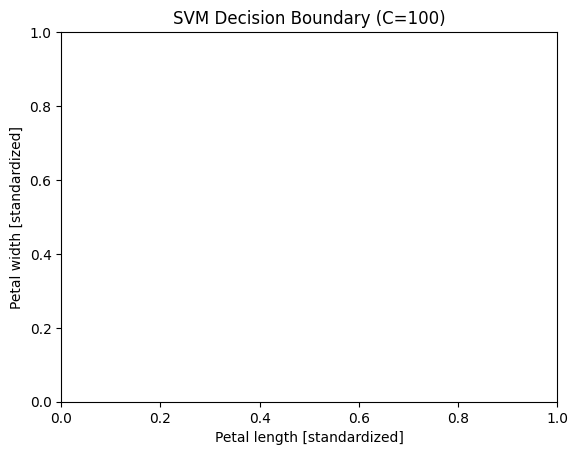

In [29]:
from sklearn.svm import SVC

C_values = [1.0, 100]

for C_val in C_values:

    svm = SVC(kernel='linear', C=C_val, random_state=1)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    print(f"SVM with C={C_val}: Accuracy = {accuracy_score(y_test, y_pred):.3f}")
    print(f"Number of support vectors (C={C_val}):", len(svm.support_vectors_))
    print("Support vectors:\n", svm.support_vectors_[:5], "...")
    plot_decision_regions(X_combined_std, y_combined, classifier=svm,test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'SVM Decision Boundary (C={C_val})')
    plt.show()

Moons Dataset -> gamma=0.01, Accuracy=0.800


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


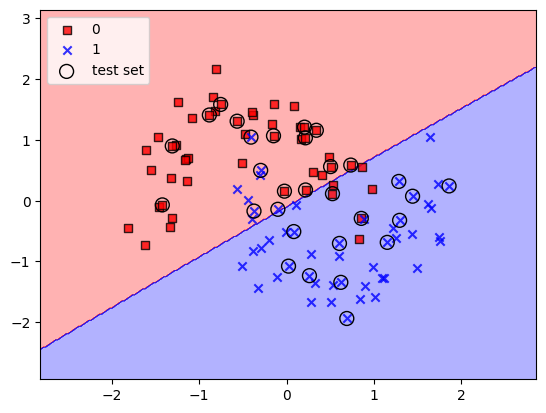

/tmp/ipython-input-809442564.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


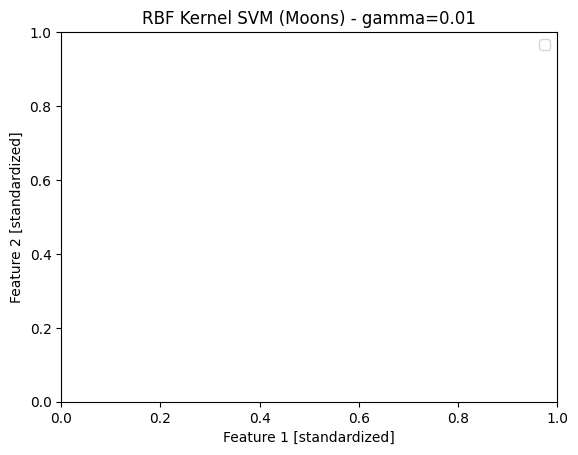

Moons Dataset -> gamma=1, Accuracy=0.867


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


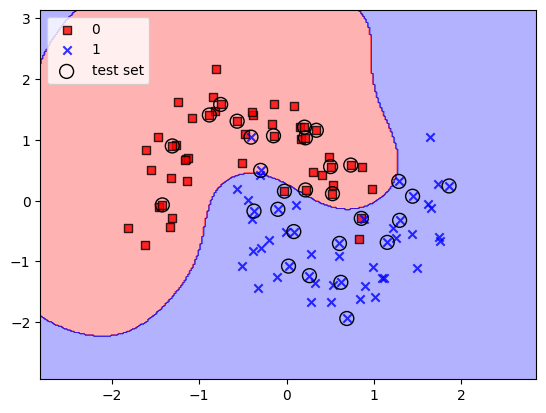

/tmp/ipython-input-809442564.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


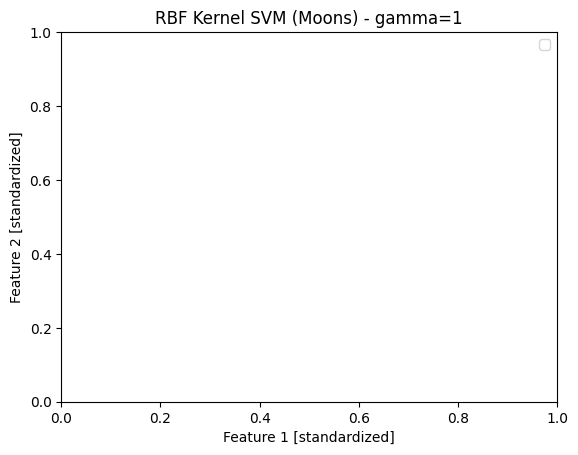

Moons Dataset -> gamma=100, Accuracy=0.867


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


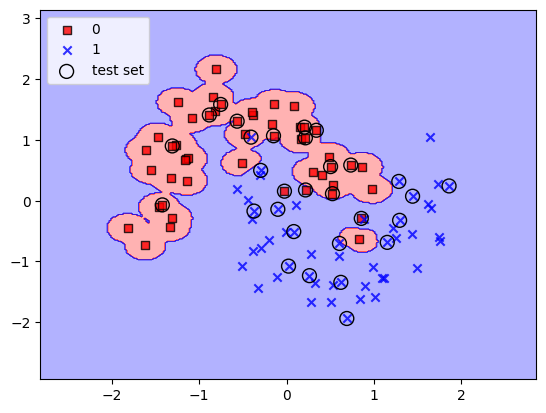

/tmp/ipython-input-809442564.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


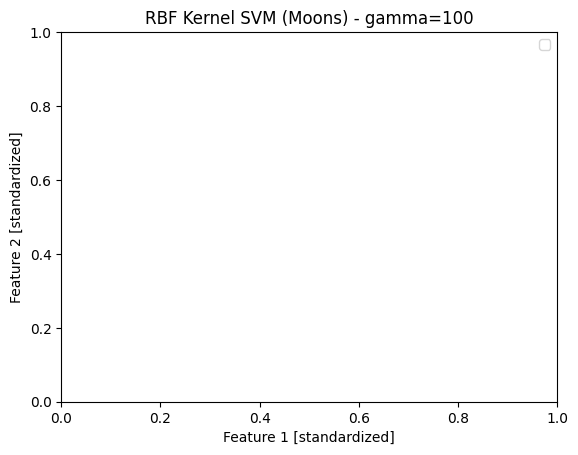

/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Iris Linear SVM Accuracy = 1.000


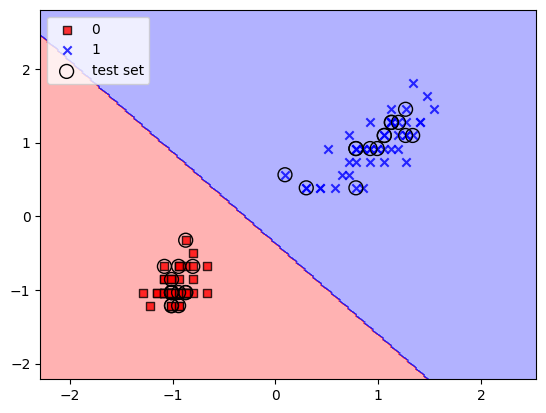

/tmp/ipython-input-809442564.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


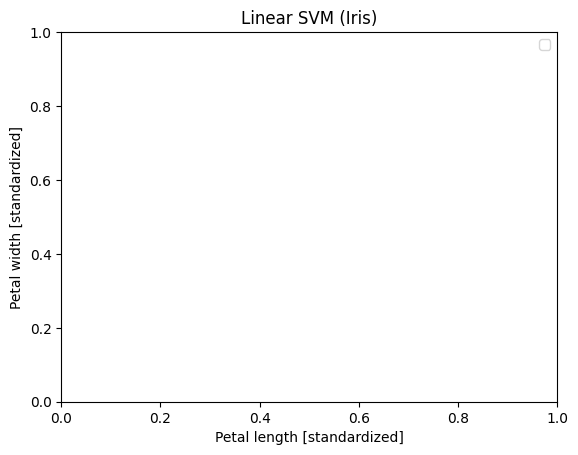

/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Iris RBF Kernel SVM Accuracy = 1.000


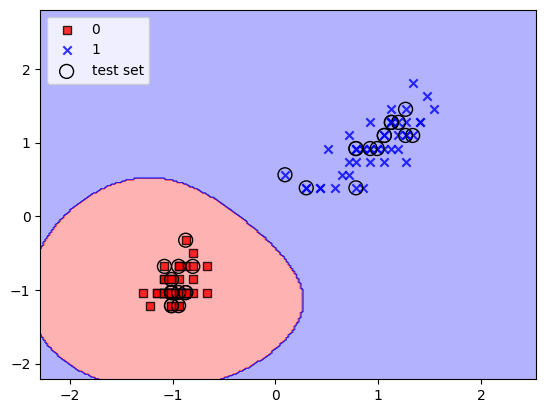

/tmp/ipython-input-809442564.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


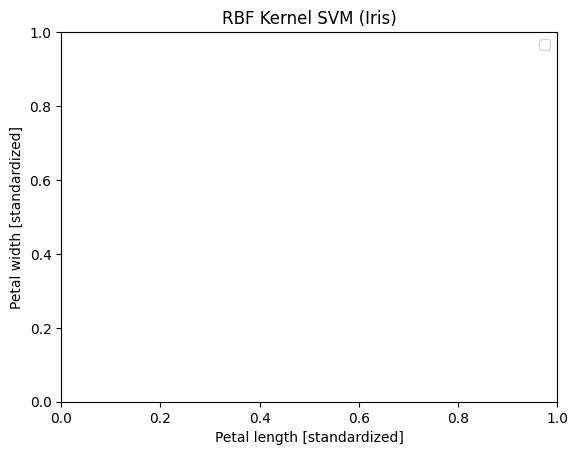

In [30]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=123)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))


for gamma_val in [0.01, 1, 100]:
    svm_rbf = SVC(kernel='rbf', random_state=1, gamma=gamma_val, C=1.0)
    svm_rbf.fit(X_train_m_std, y_train_m)
    y_pred_m = svm_rbf.predict(X_test_m_std)

    print(f"Moons Dataset -> gamma={gamma_val}, Accuracy={accuracy_score(y_test_m, y_pred_m):.3f}")

    plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf,test_idx=range(len(X_train_m), len(X_combined_m_std)))
    plt.xlabel("Feature 1 [standardized]")
    plt.ylabel("Feature 2 [standardized]")
    plt.title(f"RBF Kernel SVM (Moons) - gamma={gamma_val}")
    plt.legend()
    plt.show()


iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


svm_linear = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear.fit(X_train_std, y_train)
print(f"Iris Linear SVM Accuracy = {accuracy_score(y_test, svm_linear.predict(X_test_std)):.3f}")

plot_decision_regions(X_combined_std, y_combined, classifier=svm_linear,test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.title("Linear SVM (Iris)")
plt.legend()
plt.show()


svm_rbf = SVC(kernel='rbf', C=1.0, gamma=1.0, random_state=1)
svm_rbf.fit(X_train_std, y_train)
print(f"Iris RBF Kernel SVM Accuracy = {accuracy_score(y_test, svm_rbf.predict(X_test_std)):.3f}")

plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf,test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.title("RBF Kernel SVM (Iris)")
plt.legend()
plt.show()

Depth=1, Accuracy=1.000


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


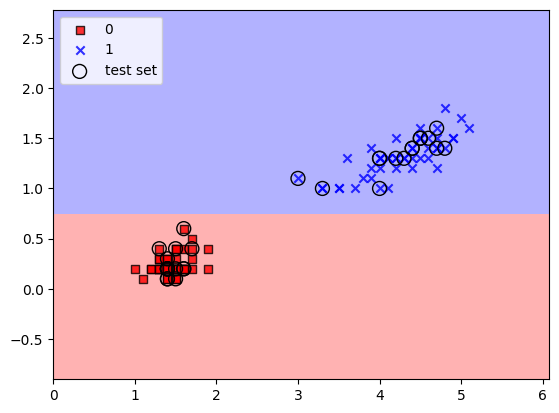

/tmp/ipython-input-3715302230.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


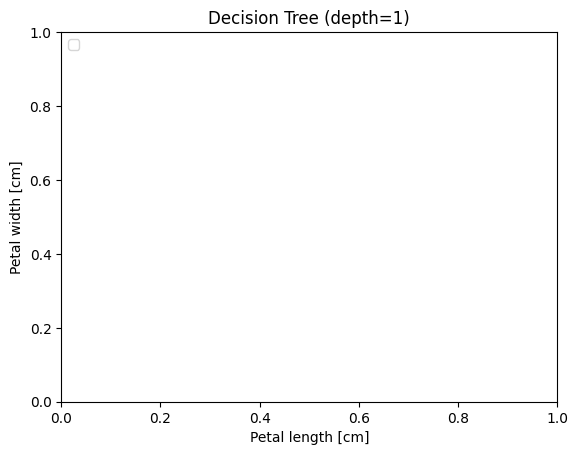

/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Depth=3, Accuracy=1.000


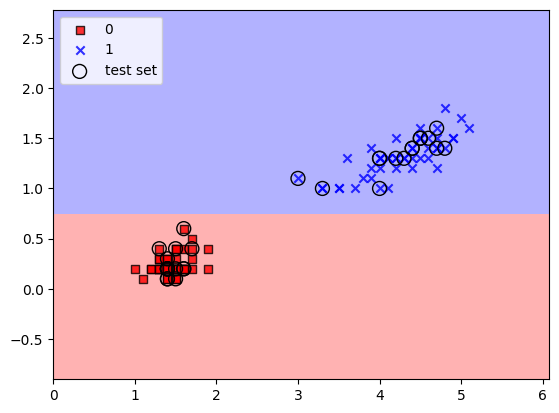

/tmp/ipython-input-3715302230.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


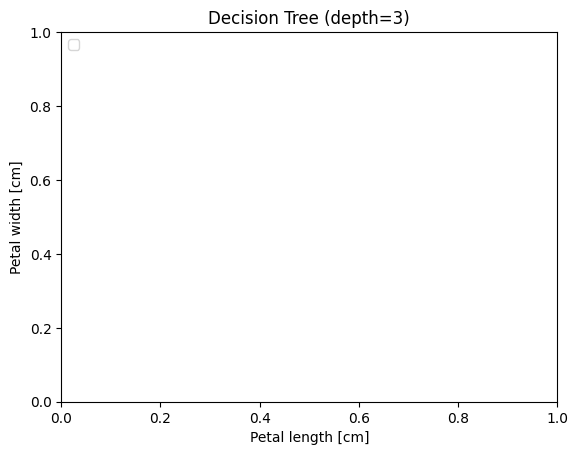

/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Depth=5, Accuracy=1.000


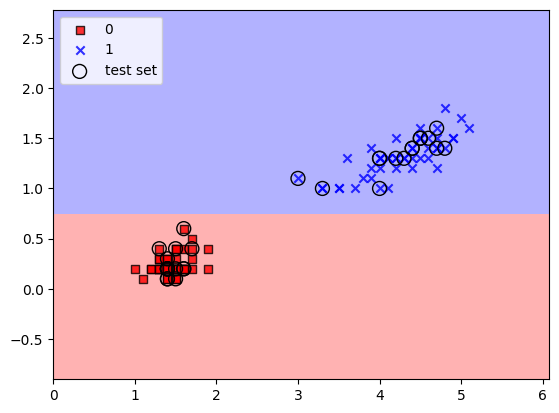

/tmp/ipython-input-3715302230.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


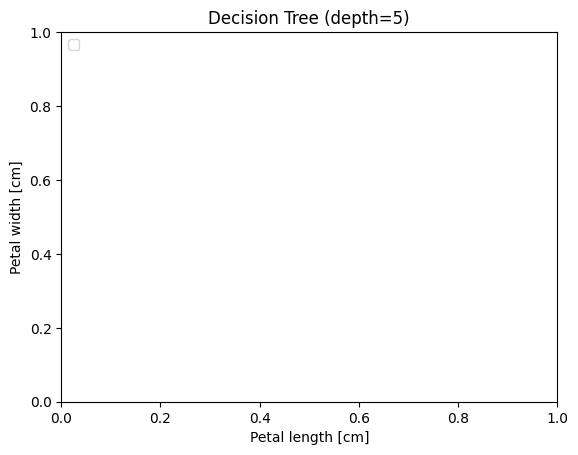

/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Depth=10, Accuracy=1.000


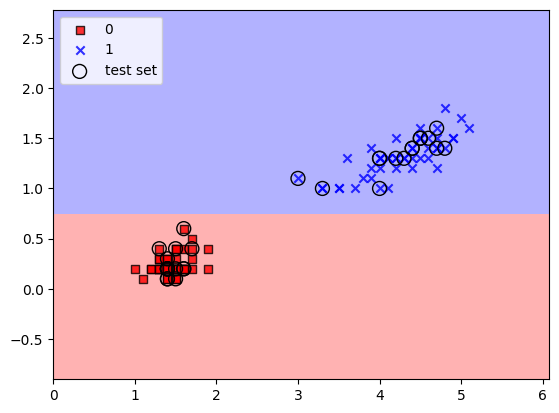

/tmp/ipython-input-3715302230.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


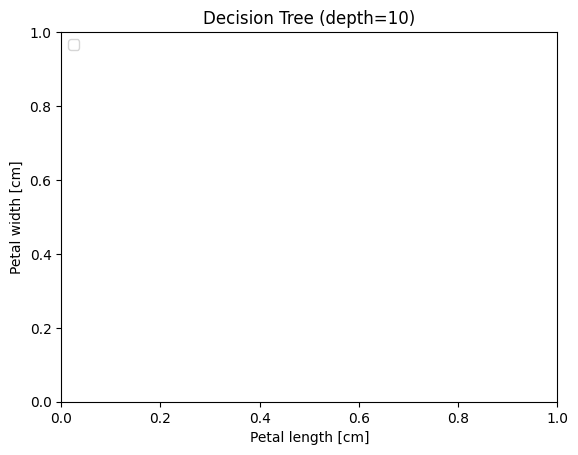

Entropy criterion, Accuracy: 1.0
Tree exported as decision_tree.png


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

for depth in [1, 3, 5, 10]:
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    print(f"Depth={depth}, Accuracy={accuracy_score(y_test, y_pred):.3f}")

    plot_decision_regions(X_combined, y_combined, classifier=tree,test_idx=range(len(X_train), len(X_combined)))
    plt.xlabel('Petal length [cm]')
    plt.ylabel('Petal width [cm]')
    plt.title(f"Decision Tree (depth={depth})")
    plt.legend(loc='upper left')
    plt.show()

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)
print("Entropy criterion, Accuracy:", accuracy_score(y_test, y_pred))


dot_data = export_graphviz(
    tree, filled=True, rounded=True,
    class_names=iris.target_names,
    feature_names=['petal length', 'petal width'],
    out_file=None
)
graph = graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
print("Tree exported as decision_tree.png")

Accuracy: 1.0
OOB Score: 1.0
Feature Importances: [0.5 0.5]


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


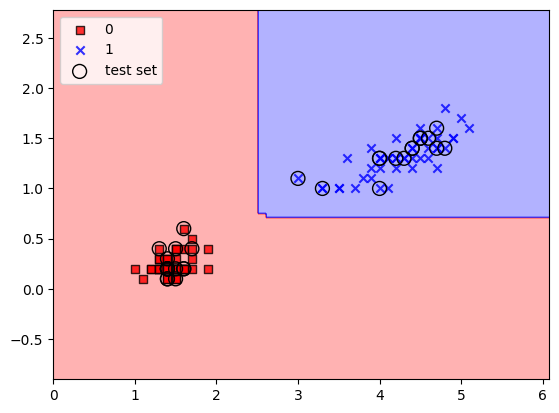

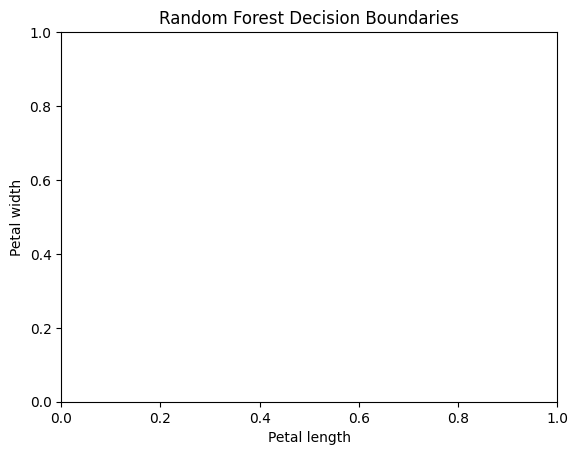

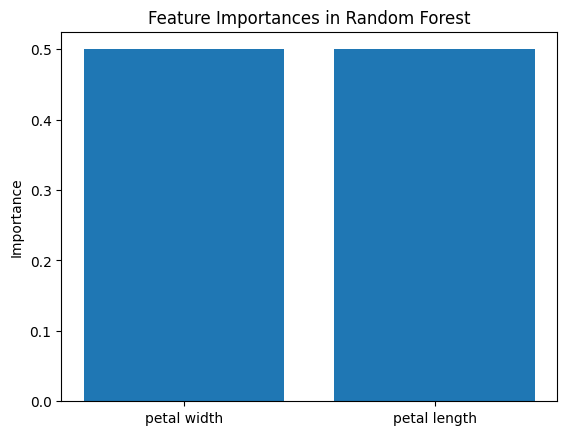

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=1,n_jobs=2,oob_score=True)
forest.fit(X_train, y_train)


y_pred = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Score:", forest.oob_score_)
print("Feature Importances:", forest.feature_importances_)


X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,classifier=forest,test_idx=range(len(X_train), len(X_combined)))

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title("Random Forest Decision Boundaries")
plt.show()


importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
features = ['petal length', 'petal width']

plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices])
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest")
plt.show()

KNN (k=1, Euclidean): Accuracy=1.000


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


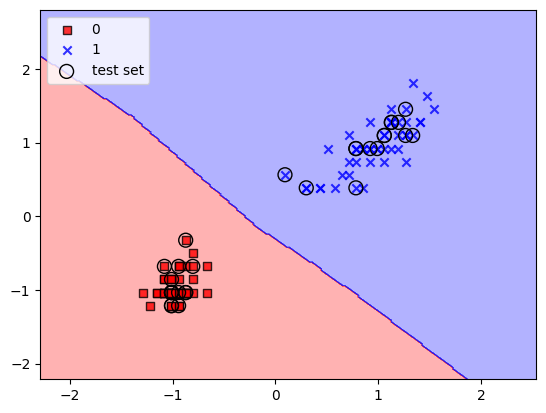

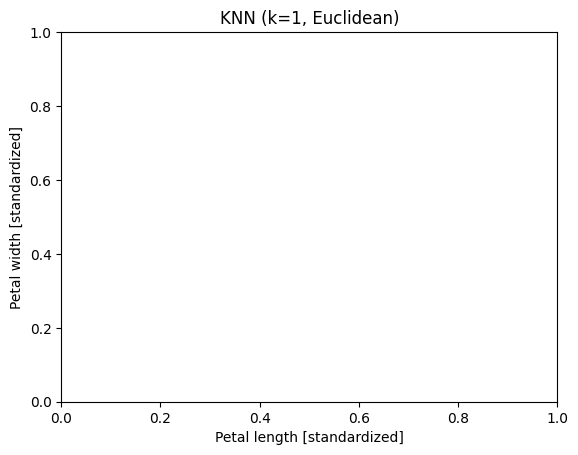

KNN (k=5, Euclidean): Accuracy=1.000


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


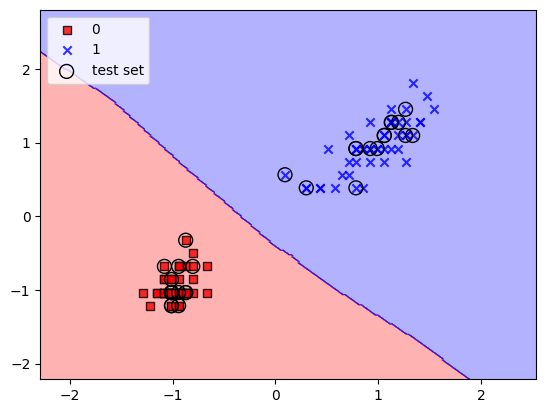

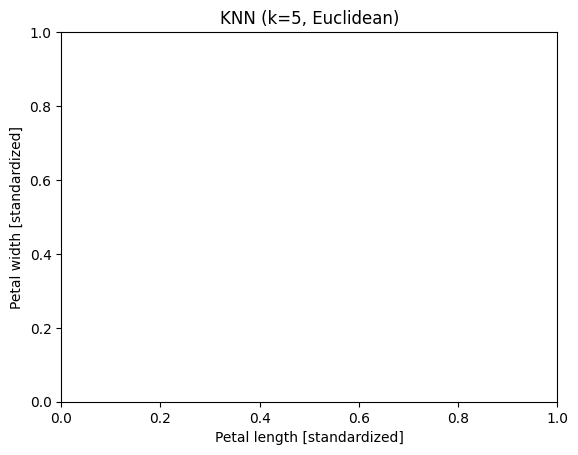

KNN (k=10, Euclidean): Accuracy=1.000


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


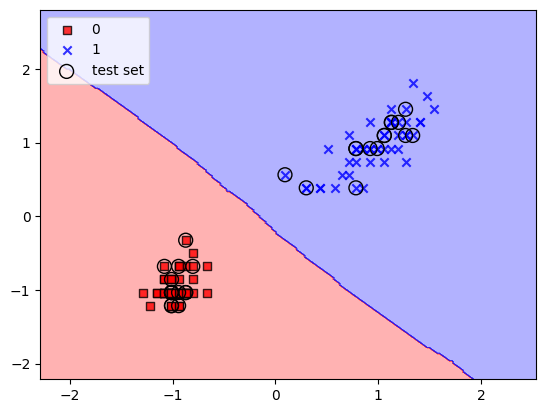

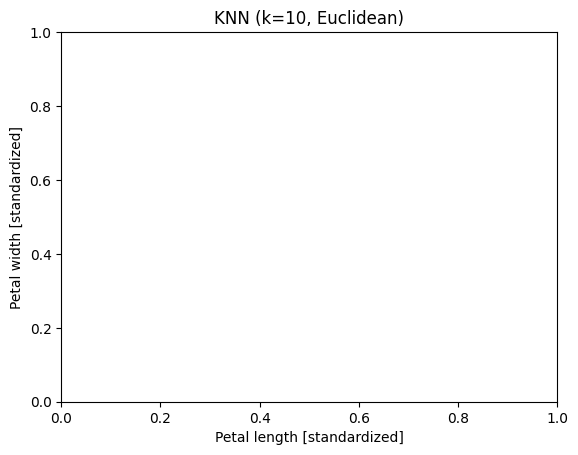

KNN (k=5, Manhattan): Accuracy=1.000


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


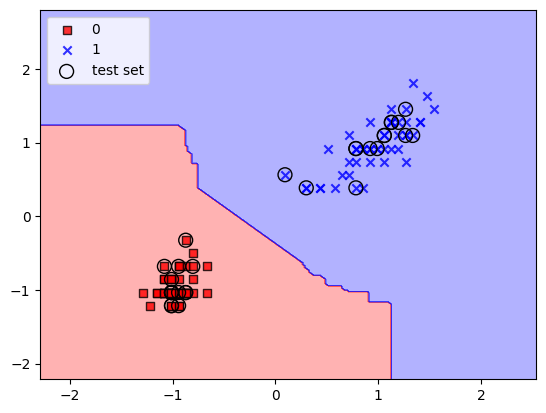

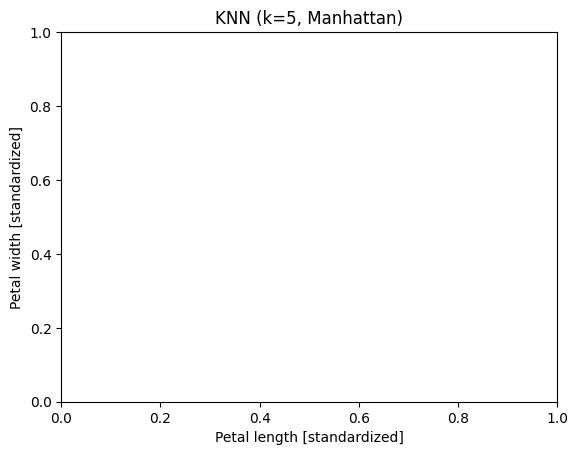

In [37]:
from sklearn.neighbors import KNeighborsClassifier

for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train_std, y_train)

    y_pred = knn.predict(X_test_std)
    print(f"KNN (k={k}, Euclidean): Accuracy={accuracy_score(y_test, y_pred):.3f}")

    plot_decision_regions(X_combined_std, y_combined,classifier=knn,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'KNN (k={k}, Euclidean)')
    plt.show()


for k in [5]:
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn.fit(X_train_std, y_train)

    y_pred = knn.predict(X_test_std)
    print(f"KNN (k={k}, Manhattan): Accuracy={accuracy_score(y_test, y_pred):.3f}")

    plot_decision_regions(X_combined_std, y_combined,classifier=knn,test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'KNN (k={k}, Manhattan)')
    plt.show()

Overfitting (too complex, k too small):

The classifier pays attention to every tiny detail in the training set.

Even one noisy or mislabeled point can change predictions.

Underfitting (too simple, k too large):

The classifier smooths out the data too much.

Local patterns or small clusters of a minority class get ignored.

In [38]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid_svm = {'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10],'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_std, y_train)
print("SVM Best Params:", grid_svm.best_params_)
print("SVM Best CV Score:", grid_svm.best_score_)


param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l2'],'solver': ['lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)
print("LogReg Best Params:", grid_lr.best_params_)
print("LogReg Best CV Score:", grid_lr.best_score_)


param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 10, 15],'p': [1, 2]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)
print("KNN Best Params:", grid_knn.best_params_)
print("KNN Best CV Score:", grid_knn.best_score_)


models = {
    'Perceptron': ppn,
    'LogReg': grid_lr.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'Tree': tree,
    'Forest': forest,
    'KNN': grid_knn.best_estimator_
}

results = {}
for name, model in models.items():
    if name in ['Perceptron', 'LogReg', 'SVM', 'KNN']:
        y_pred = model.predict(X_test_std)
    else:
        y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\n--- Accuracy Comparison on Iris (2D) ---")
print(results_df)


X_moons, y_moons = make_moons(n_samples=300, noise=0.25, random_state=1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)
sc_moons = StandardScaler()
X_train_m_std = sc_moons.fit_transform(X_train_m)
X_test_m_std = sc_moons.transform(X_test_m)

moon_results = {}
for name, model in models.items():
    if name in ['Perceptron', 'LogReg', 'SVM', 'KNN']:
        model.fit(X_train_m_std, y_train_m)
        y_pred_m = model.predict(X_test_m_std)
    else:
        model.fit(X_train_m, y_train_m)
        y_pred_m = model.predict(X_test_m)
    moon_results[name] = accuracy_score(y_test_m, y_pred_m)

moon_df = pd.DataFrame(list(moon_results.items()), columns=['Model', 'Accuracy'])
print("\n--- Accuracy Comparison on Moons ---")
print(moon_df)

SVM Best Params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Best CV Score: 1.0
LogReg Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
LogReg Best CV Score: 1.0
KNN Best Params: {'n_neighbors': 1, 'p': 1}
KNN Best CV Score: 1.0

--- Accuracy Comparison on Iris (2D) ---
        Model  Accuracy
0  Perceptron  0.466667
1      LogReg  1.000000
2         SVM  1.000000
3        Tree  1.000000
4      Forest  1.000000
5         KNN  1.000000

--- Accuracy Comparison on Moons ---
        Model  Accuracy
0  Perceptron  0.866667
1      LogReg  0.822222
2         SVM  0.755556
3        Tree  0.855556
4      Forest  0.933333
5         KNN  0.944444


Linear Data

Logistic Regression and Linear SVM perform very well.

They create straight line  decision boundaries.

Simple, efficient, less risk of overfitting if data is nearly linear.

Perceptron also works, but less stable than Logistic Regression.

Trees/Forests/KNN can still fit linear data, but they are usually more complex than needed.


Nonlinear Data

SVM with RBF kernel works best because the kernel maps nonlinear data into higher dimensions where it becomes separable.

Decision Trees and Random Forests handle irregular, wavy boundaries well.

KNN can also adapt to nonlinear shapes if k is tuned properly.

Logistic Regression and Linear SVM fail here because they can only draw straight lines.

1. How does regularization prevent overfitting?

Overfitting happens when a model fits noise instead of true patterns. Regularization adds a penalty for large coefficients, this forces the model to keep weights small which simplifies the decision boundary and improves generalization to new, unseen data.

Regularization reduces model complexity and prevents memorizing noise.

2. When to use ensembles vs. simple models?

Simple models work best for small, clean, mostly linear datasets.
Easier to interpret.

Ensembles is useful when data is large, noisy, or nonlinear.

Combine multiple models to reduce variance and bias.

Usually outperform single models but are harder to interpret.


In [23]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

